In [15]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

C:\Users\dell


In [8]:
adata = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Datesets\listings.csv")
adata.nunique() #shows that there are 4 types of room type and 33 types of neighbourhood

id                                68024
name                              67026
host_id                           45229
host_name                         13043
neighbourhood                        33
room_type                             4
price                              1414
minimum_nights                      124
number_of_reviews                   434
last_review                        2728
reviews_per_month                   841
calculated_host_listings_count       77
availability_365                    366
number_of_reviews_ltm               157
dtype: int64

<AxesSubplot:>

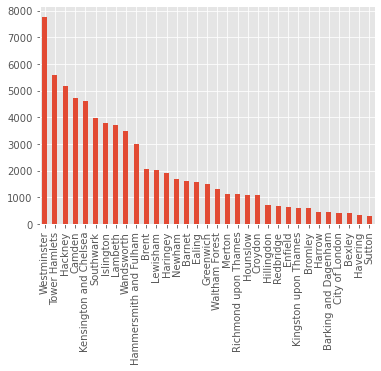

In [16]:
#Neighbours with count of host
N_count=adata["neighbourhood"].value_counts()
N_count.plot.bar(y = 'count') # shows that Wesrminister neighbour has largest number of booking and Sutton lowest

<AxesSubplot:>

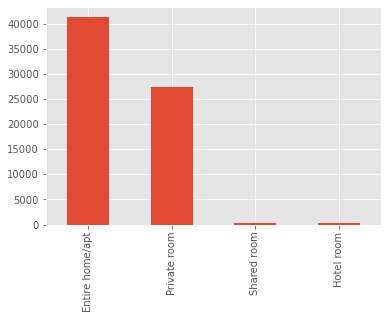

In [19]:
RoomT_count=adata["room_type"].value_counts()
RoomT_count.plot.bar(y = 'count') # shows that Entire home has highest booking and hotel room and shared room least

In [38]:
RT_N_P = adata[["room_type","neighbourhood","price"]]
RT_N_P = RT_N_P.groupby(["room_type","neighbourhood"])

In [39]:
RT_N_P = RT_N_P["price"].mean().to_frame()

In [40]:
RT_N_P = pd.pivot_table(data=RT_N_P, index=['neighbourhood'], columns=['room_type'], values='price')

<AxesSubplot:xlabel='neighbourhood'>

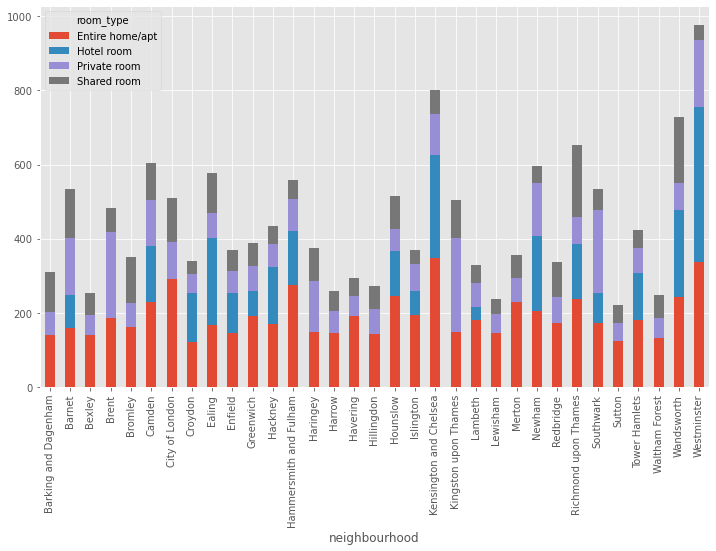

In [41]:
RT_N_P.plot.bar(stacked = True, figsize = (12,7)) #avg price for Shared room is least and entire app is highest after hotel room but the number 
#of booking for entire home is highest and shared is lowest

In [45]:
RT_P = adata[["room_type","price"]]
RT_P = adata.groupby("room_type")

In [46]:
RT_P["price"].mean()

room_type
Entire home/apt    227.138778
Hotel room         245.836066
Private room       103.326067
Shared room         66.235149
Name: price, dtype: float64

In [74]:
#Relation between number of booking for each neightbour anf room_type
RT_N = adata[["room_type","neighbourhood"]]

In [78]:
#RT_N = pd.pivot_table(data=RT_N, index=['neighbourhood'], columns=['room_type'], values='room_type')
RT_N =RT_N.groupby("neighbourhood")

In [84]:
RT_N = RT_N["room_type"].value_counts().to_frame()

In [85]:
RT_N.rename(columns = {"room_type":"count"}, inplace = True)

In [91]:
RT_N = RT_N.reset_index()

ValueError: cannot insert level_0, already exists

In [92]:
RT_N = pd.pivot_table(data=RT_N, index=['neighbourhood'], columns=['room_type'], values='count')

In [94]:
RT_N

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Barking and Dagenham,185.0,NaN,243.0,5.0
Barnet,832.0,4.0,762.0,13.0
Bexley,173.0,NaN,235.0,3.0
Brent,1091.0,NaN,968.0,9.0
Bromley,291.0,NaN,299.0,4.0
Camden,3149.0,16.0,1511.0,31.0
City of London,374.0,NaN,49.0,1.0
Croydon,485.0,2.0,571.0,8.0
Ealing,717.0,5.0,824.0,7.0


<AxesSubplot:xlabel='neighbourhood'>

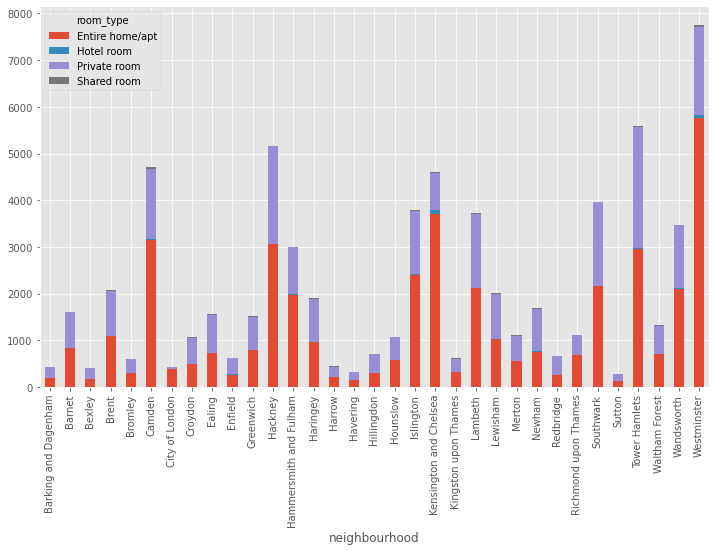

In [93]:
RT_N.plot.bar(stacked = True, figsize = (12,7)) #shows that Entire room and private rooms are mostly avaiable for all regions

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

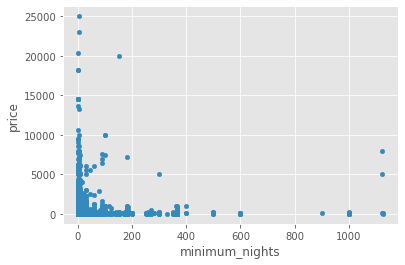

In [131]:
#Relation between munimum nights and price
adata.plot.scatter(x = "minimum_nights",y="price")